<a href="https://colab.research.google.com/github/funmeen/legendary-eureka/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("/content/Heart.csv")
df


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [3]:
df = df.drop(columns = 'Unnamed: 0')
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [4]:
df.isnull().sum()
df = df.dropna()
df

X = df[['Age', 'Chol']].values
Y = df['AHD']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 21)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
from sklearn import svm
from sklearn.svm import SVC

In [60]:
model = SVC(kernel='rbf', C=100000)
model.fit(X_train_pca, y_train)

SVC(C=100000)

In [61]:
y_pred = model.predict(X_test_pca)

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [63]:
accuracy = accuracy_score(y_test, y_pred)
classf_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
f1_score = 2 * (precision * recall)/(precision + recall)

print("Classification Report:", classf_report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Classification Report:               precision    recall  f1-score   support

           0       0.52      0.65      0.58        46
           1       0.50      0.36      0.42        44

    accuracy                           0.51        90
   macro avg       0.51      0.51      0.50        90
weighted avg       0.51      0.51      0.50        90

Accuracy: 0.5111111111111111
Precision: 0.5
Recall: 0.36363636363636365
F1-score: 0.4210526315789474


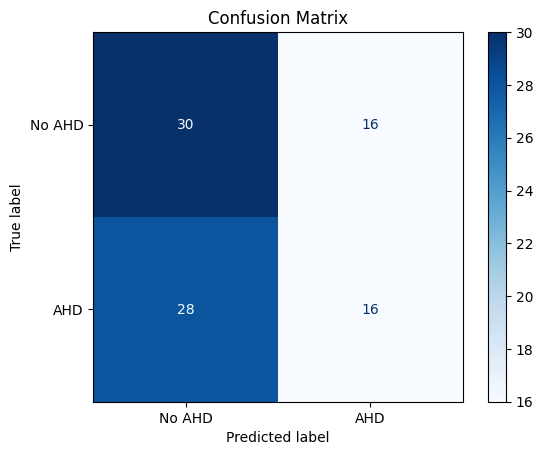

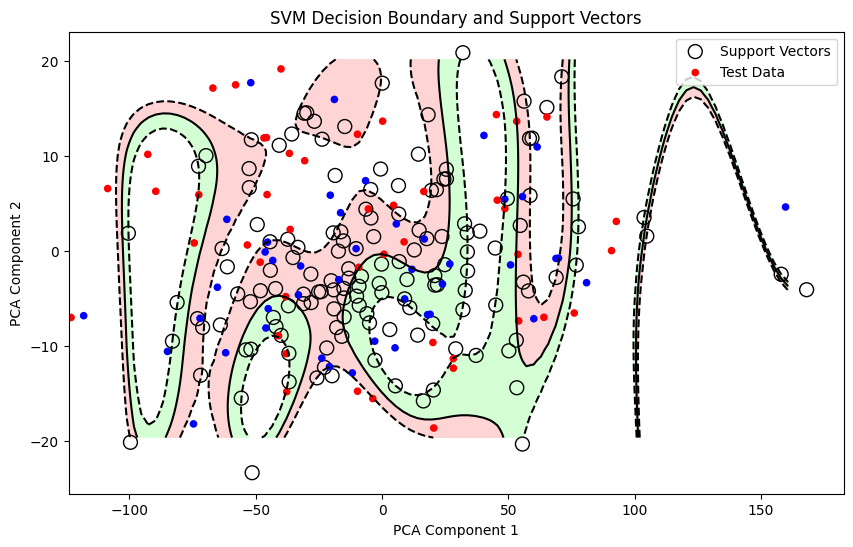

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_pca, y_test, cmap='Blues', display_labels=["No AHD", "AHD"])
plt.title("Confusion Matrix")
plt.show()

# Plot the decision boundary, margins, and support vectors
plt.figure(figsize=(10, 6))

# Create a mesh grid to plot the decision function
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Get the decision function for the SVM
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors")

# Plot test data points with different colors for each class
colors = ["red" if y == 0 else "blue" for y in y_test]
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, s=20, label="Test Data")

plt.title("SVM Decision Boundary and Support Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Chol'>

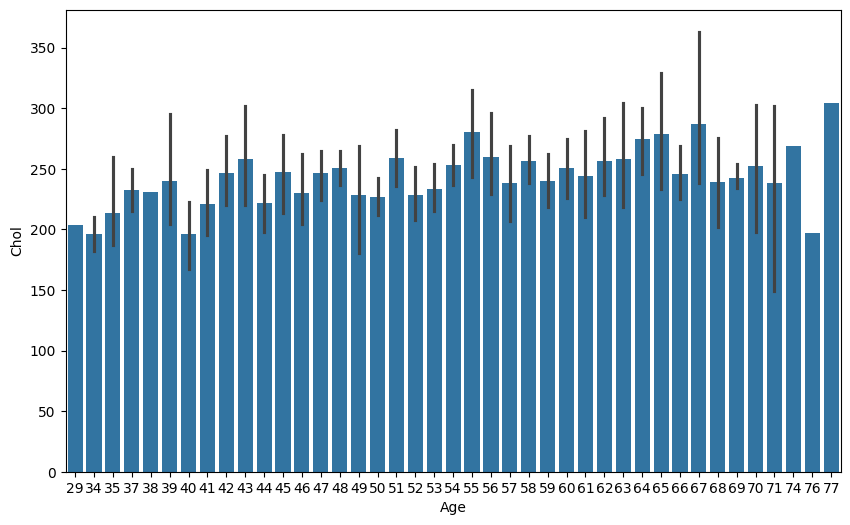

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Age', y = 'Chol', data = df )

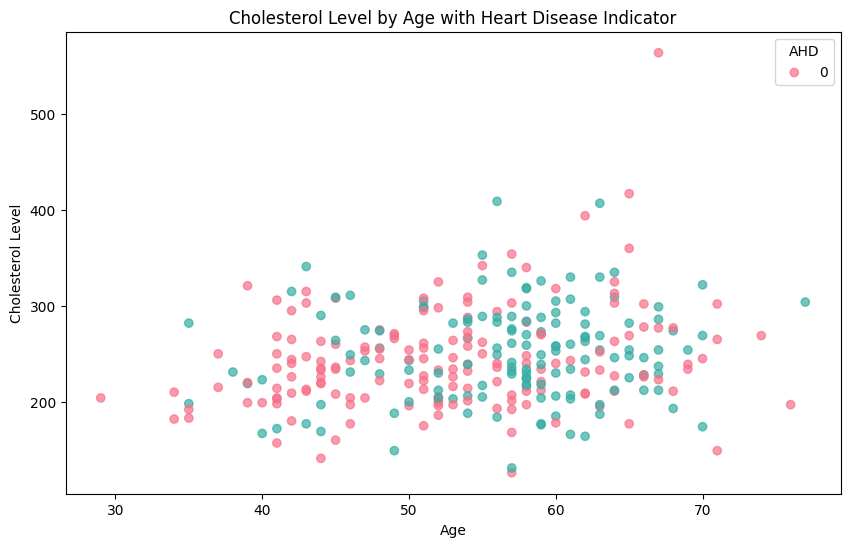

In [69]:
# Create a scatter plot with color mapping
plt.figure(figsize=(10, 6))
color_palette = sns.color_palette("husl", df['AHD'].nunique())
color_map = dict(zip(df['AHD'].unique(), color_palette))
plt.scatter(df['Age'], df['Chol'], c=df['AHD'].map(color_map), alpha=0.7)

# Label axes and title
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Level by Age with Heart Disease Indicator")

# Add a legend with color mapping
plt.legend(color_map.keys(), title='AHD')

plt.show()


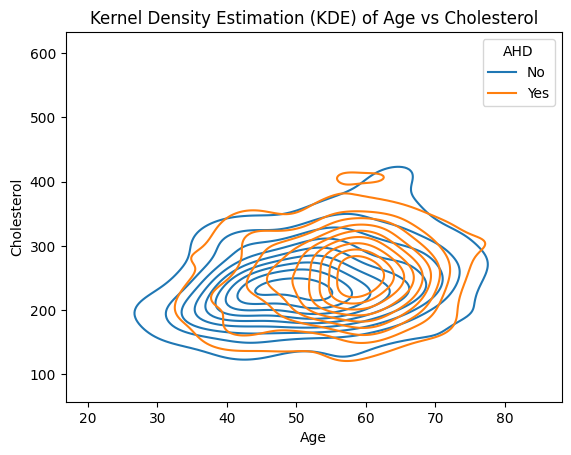

In [57]:
sns.kdeplot(data=df, x='Age', y='Chol', hue='AHD')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Kernel Density Estimation (KDE) of Age vs Cholesterol')
plt.show()

In [51]:
import plotly.express as px
import pandas as pd

df['AHD_numeric'] = df['AHD'].map({'No': 0, 'Yes': 1})
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Age', y='Chol', z='AHD_numeric', color='AHD', title='3D Scatter Plot of Age vs Cholesterol with AHD')

# Show the plot with interactive controls
fig.show()


In [53]:
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import Rbf
import pandas as pd

# Fit the Gaussian RBF kernel to the data
rbf = Rbf(df['Age'], df['Chol'], df['AHD_numeric'], function='gaussian')

# Create a mesh grid for evaluation
x = np.linspace(min(df['Age']), max(df['Age']), 100)
y = np.linspace(min(df['Chol']), max(df['Chol']), 100)
xg, yg = np.meshgrid(x, y)

# Evaluate the RBF on the grid
zg = rbf(xg, yg)

# Create a 3D plot with plotly
fig = go.Figure()

# Add the RBF surface
fig.add_trace(go.Surface(z=zg, x=xg, y=yg, colorscale='Viridis', opacity=0.5, name='RBF Surface'))

# Add the scatter plot for original data
fig.add_trace(go.Scatter3d(
    x=df['Age'],
    y=df['Chol'],
    z=df['AHD_numeric'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Data Points'
))

# Update labels and title
fig.update_layout(
    title='3D Gaussian RBF Surface with Age, Cholesterol, and AHD',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Cholesterol',
        zaxis_title='AHD (Numeric)'
    ),
    showlegend=True
)

# Display the interactive plot
fig.show()
